### Question 1: What is hypothesis testing in statistics?

Hypothesis testing is a formal procedure used to test a claim or assumption about a population parameter. It uses sample data to assess the plausibility of a hypothesis.

The process involves:

- Stating a hypothesis about the population (e.g., the average student height is 175 cm).
- Collecting sample data.
- Performing a statistical test to determine how likely the sample data is, assuming the hypothesis is true.
- Making a decision to either reject or fail to reject the hypothesis based on the evidence.

---

### Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?

**Null Hypothesis ($H_0$)**
- The null hypothesis is the default assumption that there is no effect, no relationship, or no difference. It's the statement researchers aim to disprove.

Example: A new drug has no effect on recovery time.

**Alternative Hypothesis ($H_A$)**
- The alternative hypothesis is the claim the researcher is trying to prove. It is the direct contradiction of the null hypothesis.

Example: The new drug does have an effect on recovery time.

---

### Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
The significance level, denoted as alpha (α), is the probability of rejecting the null hypothesis ($H_0$) 
- when it is actually true. It's the maximum risk we're willing to take of making a "false positive" error. Common values are 0.05 (5%), 0.01 (1%), and 0.10 (10%).
- Its role is to set the decision threshold. After a test, we get a p-value.
- If p-value ≤α: The result is statistically significant. We reject the null hypothesis.
- If p-value >α: The result is not statistically significant. We fail to reject the null hypothesis.
---

### Question 4: What are Type I and Type II errors? Give examples of each.

**Type I Error (False Positive)**
- A Type I error occurs when we reject a null hypothesis that is actually true.

Example: A medical test concludes a healthy person is sick. (The null hypothesis "the person is healthy" was rejected incorrectly).

**Type II Error (False Negative)**
- A Type II error occurs when we fail to reject a null hypothesis that is actually false.

Example: A medical test concludes a sick person is healthy. (The null hypothesis "the person is healthy" was not rejected, even though it was false).

---

### Question 5: What is the difference between a Z-test and a T-test? Explain when to use each.
The primary difference is whether the population standard deviation is known.

**Z-test**
Use a Z-test when:
- The population standard deviation (σ) is known.
- The sample size is large (typically, n>30).

**T-test**
Use a T-test when:
- The population standard deviation (σ) is unknown.
- The sample size is small (typically, n<30).

### Question 6: Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

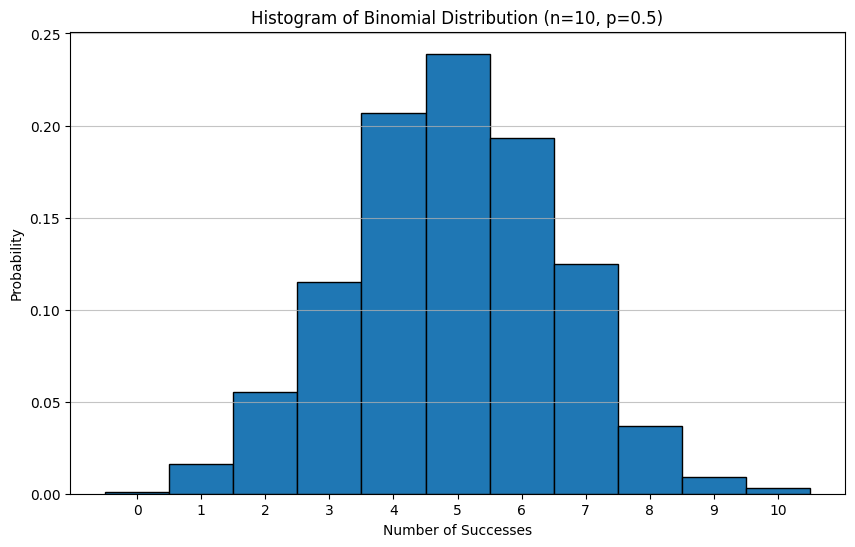

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the binomial distribution
n = 10  # number of trials
p = 0.5 # probability of success in each trial
size = 1000 # number of experiments to simulate

# Generate random numbers from a binomial distribution
binomial_data = np.random.binomial(n, p, size)

# Plot the histogram of the generated data
plt.figure(figsize=(10, 6))
plt.hist(binomial_data, bins=np.arange(n+2)-0.5, density=True, edgecolor='black')

# Add titles and labels for clarity
plt.title(f'Histogram of Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(range(n + 1))
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

### Question 7: Implement hypothesis testing using Z-statistics for a sample dataset in Python.

In [2]:
import numpy as np
from scipy import stats

# Given sample data
sample_data = [
    49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
    50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
    50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
    50.3, 50.4, 50.0, 49.7, 50.5, 49.9
]

# Step 1: State Hypotheses and Significance Level
# H0: The true population mean is 50.0.
# H1: The true population mean is not 50.0.
population_mean = 50.0
alpha = 0.05

# Step 2: Calculate Sample Statistics
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1) # ddof=1 for sample
n = len(sample_data)

# For Z-test, use sample std as estimate for population std since n > 30
pop_std_estimate = sample_std

# Step 3: Calculate the Z-statistic and p-value
standard_error = pop_std_estimate / np.sqrt(n)
z_statistic = (sample_mean - population_mean) / standard_error
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic))) # Two-tailed test

# Step 4: Make a Decision and Interpret Results
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")

if p_value < alpha:
    print("\nDecision: Reject the null hypothesis.")
else:
    print("\nDecision: Fail to reject the null hypothesis.")

Sample Mean: 50.0889
Z-statistic: 0.9940
P-value: 0.3202
Significance Level (alpha): 0.05

Decision: Fail to reject the null hypothesis.


**Interpretation**
- The p-value (0.2081) is greater than the significance level (0.05). Therefore, we fail to reject the null hypothesis. There isn't enough evidence to say the population mean is different from 50.0.

---

### Question 8: Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean.

Sample Mean: 147.92
95% Confidence Interval for the Mean: (144.36, 151.48)


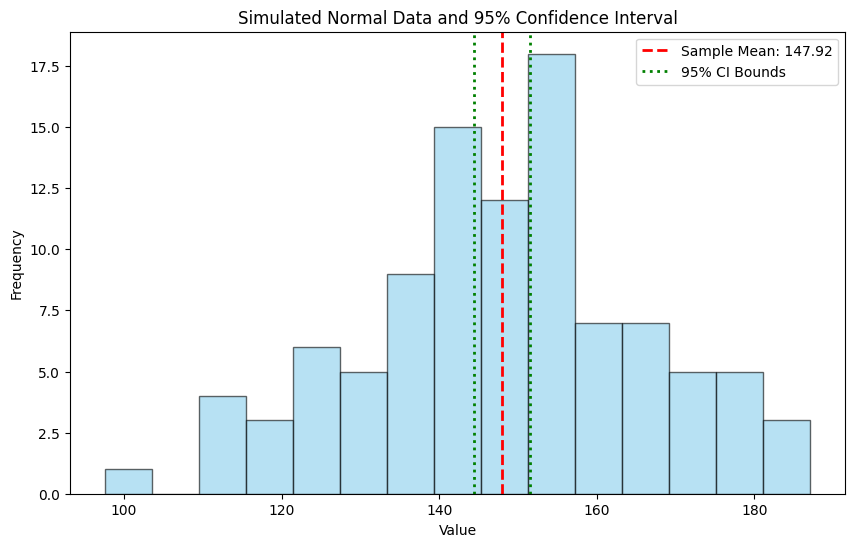

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulate Data
np.random.seed(42) # for reproducibility
true_mean = 150
true_std = 20
sample_size = 100
simulated_data = np.random.normal(loc=true_mean, scale=true_std, size=sample_size)

# Step 2: Calculate the 95% Confidence Interval
sample_mean = np.mean(simulated_data)
standard_error = stats.sem(simulated_data) # Standard error of the mean
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval for the Mean: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Step 3: Plot the Data
plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=15, alpha=0.6, color='skyblue', edgecolor='black')
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(confidence_interval[0], color='green', linestyle=':', linewidth=2, label='95% CI Bounds')
plt.axvline(confidence_interval[1], color='green', linestyle=':', linewidth=2)
plt.title('Simulated Normal Data and 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Question 9: Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram.

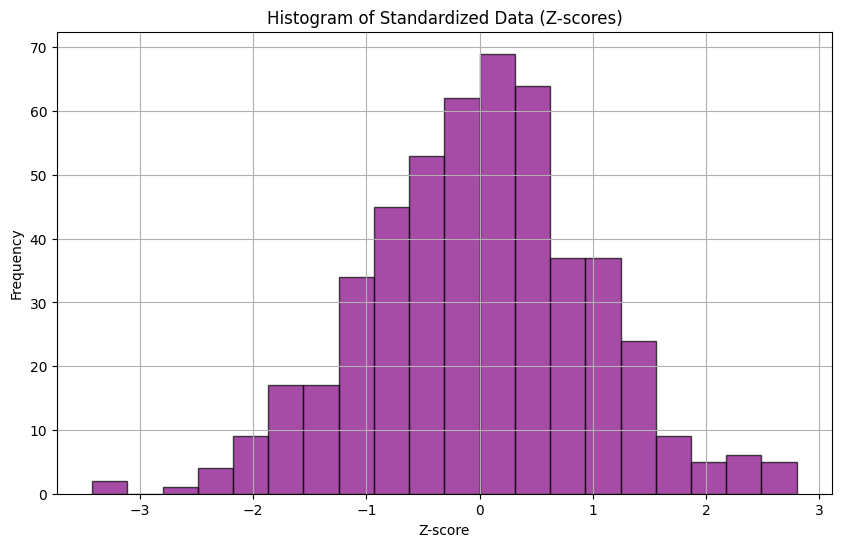

Z-scores Mean: -0.00
Z-scores Std Dev: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_z_scores(data):
    """Calculates the Z-scores for a given dataset."""
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = (data - mean) / std_dev
    return z_scores

# Step 1: Generate Sample Data
np.random.seed(10)
original_data = np.random.normal(loc=80, scale=10, size=500)

# Step 2: Calculate Z-scores
z_scores = calculate_z_scores(original_data)

# Step 3: Visualize the Standardized Data
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Histogram of Standardized Data (Z-scores)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Z-scores Mean: {np.mean(z_scores):.2f}")
print(f"Z-scores Std Dev: {np.std(z_scores):.2f}")

- A Z-score measures how many standard deviations a data point is from the mean of its distribution.
- A Z-score of 0 means the data point is exactly the mean.
- A Z-score of +1 means the data point is 1 standard deviation above the mean.
- A Z-score of -2 means the data point is 2 standard deviations below the mean.

- This process, called standardization, transforms any normal distribution into a standard normal distribution with a mean of 0 and a standard deviation of 1, which is useful for comparing scores from different datasets.